In [ ]:
!pip install yfinance
!pip install pandas_datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Importando y leyendo los datos

In [ ]:
import yfinance as yf
import pandas as pd
from pandas_datareader import data as pdr
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt

**Visualizando y limpiando los datos**

Usamos el ticket de Nasdaq, el cual es "^IXIC" para poder extraer nuestros datos

In [ ]:
from pandas_datareader import data as pdr

import yfinance as yf
yf.pdr_override() # <== that's all it takes :-)

# download dataframe
data = pdr.get_data_yahoo("^IXIC", start="1990-02-08", end="2022-11-11")

[*********************100%***********************]  1 of 1 completed


Es necesario entender las siguientes variables:



*   Open: Es el precio de apertura de la bolsa
*   High: Es el precio mas alto que alcanzo el acción en esa fecha

*   Low: Es el precio mas bajo al que llego la acción en esa fecha
*   Close: Es el precio de venta en el que termina la acción (Precio efectivo del último precio negociado antes del cierre del mercado).

*  Adj Close (Precio de cierre ajustado): Modifica el precio de cierre de una acción para reflejar el valor de esa acción después de contabilizar cualquier acción corporativa, como splits de acciones, dividendos y ofertas de derechos.
*   Volume: Es el numero de acciones que estan siendo negociadas













In [ ]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1990-02-08,428.799988,430.200012,427.100006,427.299988,427.299988,140030000
1990-02-09,428.700012,429.100006,427.500000,428.799988,428.799988,125330000
1990-02-12,428.799988,428.799988,425.799988,426.399994,426.399994,113030000
1990-02-13,425.299988,427.000000,423.899994,425.799988,425.799988,127230000
1990-02-14,426.799988,427.200012,425.500000,426.600006,426.600006,139540000
...,...,...,...,...,...,...
2022-11-04,10548.139648,10553.629883,10262.929688,10475.250000,10475.250000,5453750000
2022-11-07,10516.940430,10587.959961,10428.910156,10564.519531,10564.519531,4456690000
2022-11-08,10611.530273,10745.639648,10472.730469,10616.200195,10616.200195,5134500000


Como se trabajara con serie de tiempos, realizamos el reseteo del indice. En este caso nuestro indice 
es **Date**.

In [ ]:
data.reset_index(inplace=True,drop=False)

In [ ]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,1990-02-08,428.799988,430.200012,427.100006,427.299988,427.299988,140030000
1,1990-02-09,428.700012,429.100006,427.500000,428.799988,428.799988,125330000
2,1990-02-12,428.799988,428.799988,425.799988,426.399994,426.399994,113030000
3,1990-02-13,425.299988,427.000000,423.899994,425.799988,425.799988,127230000
4,1990-02-14,426.799988,427.200012,425.500000,426.600006,426.600006,139540000
...,...,...,...,...,...,...,...
8249,2022-11-04,10548.139648,10553.629883,10262.929688,10475.250000,10475.250000,5453750000
8250,2022-11-07,10516.940430,10587.959961,10428.910156,10564.519531,10564.519531,4456690000
8251,2022-11-08,10611.530273,10745.639648,10472.730469,10616.200195,10616.200195,5134500000
8252,2022-11-09,10528.450195,10564.969727,10344.009766,10353.169922,10353.169922,4977460000


In [ ]:
data['Date']=pd.to_datetime(data['Date'])

In [ ]:
data_ts = data[['Date','Close']]
data_ts = data_ts.set_index('Date')


Aqui presentamos la data historica del Indice de NASDAQ. Mostrandonos que finalizando el 2021, se va presentando una caida del ETF. Donde podemos concluir que dichos valores, los ha afectado los temas de pandemia e inflación.

Adicional, analizamos que trabajariamos con SARIMA, ya que, según la grafica, presenta una serie estacional.


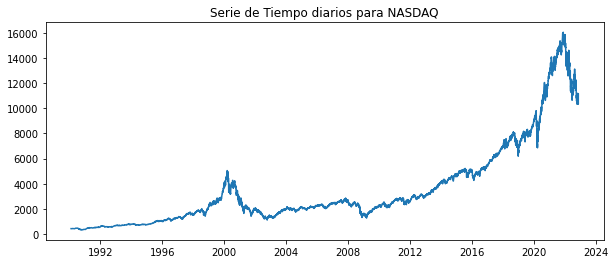

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(data_ts.index, data_ts['Close'])
plt.title('Serie de Tiempo diarios para NASDAQ');

In [ ]:
data_ts.describe()

,Close
count,8254.000000
mean,3529.598775
std,3360.771627
min,325.399994
25%,1425.447540
50%,2305.904907
75%,4506.632690
max,16057.440430


In [ ]:
data_ts.asfreq('d')

,Close
Date,
1990-02-08,427.299988
1990-02-09,428.799988
1990-02-10,NaN
1990-02-11,NaN
1990-02-12,426.399994
...,...
2022-11-06,NaN
2022-11-07,10564.519531
2022-11-08,10616.200195


Para una serie de tiempo diario, se deben llenar los dias que aparecen como **NaN** o NULL. En este caso, corresponden a los fines de semana (sábados y domingos) y festivos, días en los que la operación en la bolsa se encuentra cerrada. Por lo tanto a los valor NaN en nuestra data, se les asigna el valor anterior del CLOSE. De este modo se cumple con la frecuencia diaria que se le dio a la serie de tiempo

ACLARAMOS: Como esta pausada la operacion en la bolsa, la informacion del cierre siempre es estatica para el fin de semana.  

# Preprocesamiento de los datos

In [ ]:
data_ts = data_ts.asfreq(freq='d', method='ffill')

In [ ]:
data_ts.tail()

,Close
Date,
2022-11-06,10475.250000
2022-11-07,10564.519531
2022-11-08,10616.200195
2022-11-09,10353.169922
2022-11-10,11114.150391


# Descomposicion estacional con el metodo SARIMAX

Lo siguiente sera analizar nuestros datos, por medio de la tendencia, los valores de residuos, y los cambios estacionales

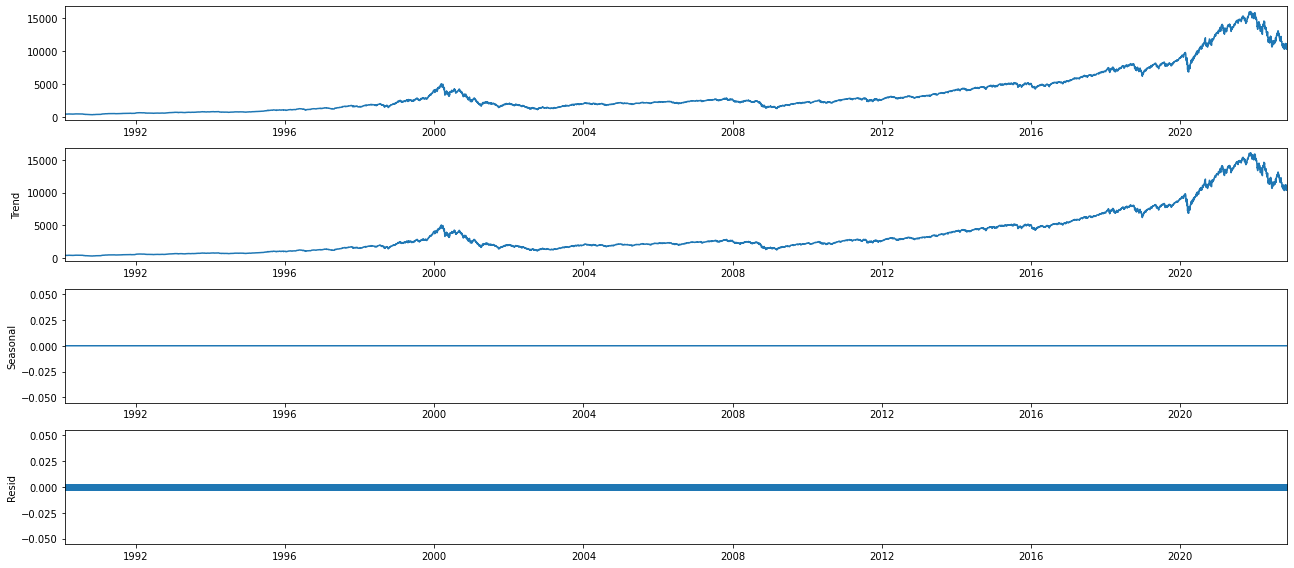

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
from pylab import rcParams

rcParams['figure.figsize'] = 18, 8
decomposition = seasonal_decompose(data_ts, model='additive', period = 1)
fig = decomposition.plot()
plt.show()

# Encontrando los terminos del modelo ARIMA para luego usarlos tambien en SARIMAX

Los parámetros del modelo ARIMA se definen de la siguiente manera:

p: El número de observaciones de retraso incluidas en el modelo, también llamado orden de retraso.

d: El número de veces que se diferencian las observaciones sin procesar, también llamado grado de diferenciación.

q: El tamaño de la ventana de media móvil, también llamado orden de media móvil

In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Un ejemplo de las medidas de correlación: 
* En términos de venta de entradas de un cine, la 
autocorrelación determina la relación entre la venta de entradas de hoy y la venta de entradas de ayer. En comparación, la autocorrelación parcial define la relación entre la venta de entradas de este viernes y la venta de entradas del viernes pasado.



## d: el numero de la diferencia requerida para hacer la serie de tiempo estacionaria (I)


In [ ]:
from pmdarima.arima.utils import ndiffs
ndiffs(data.Close, test='adf')

1

**Con este valor encontramos la diferencia para la serie de tiempo con la ayuda de ndiffs**

## p: el orden de la auto regresion (AR)
 

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


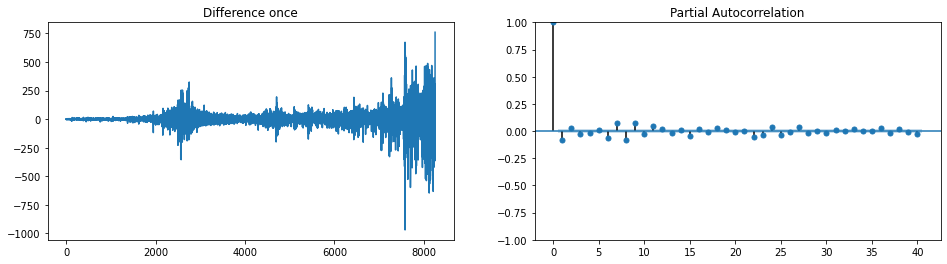

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
diff = data.Close.diff().dropna()
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (16,4))
ax1.plot(diff)
ax1.set_title('Difference once')
ax2.set_ylim(0,1)
plot_pacf(diff, ax = ax2);

## q: el orden de las medias moviles (MA)

**Dado que el primer retraso tambien es negativo y el segundo retraso es positivo, utilizaremos nuevamente el primer retraso como punto de media móvil.**

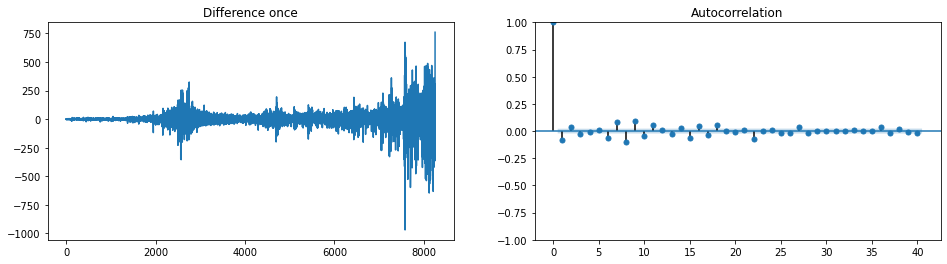

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
diff = data.Close.diff().dropna()
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (16,4))
ax1.plot(diff)
ax1.set_title('Difference once')
ax2.set_ylim(0,0.5)
plot_acf(diff, ax = ax2);

Se puede experimentar con el modelo para ver qué variación tiene el AIC más bajo. El tiempo de entrenamiento es relativamente rápido.

[*] B. Samaha. "Build an ARIMA Model to Predict a Stock’s Price". Medium. https://levelup.gitconnected.com/build-an-arima-model-to-predict-a-stocks-price-c9e1e49367d3 (accedido el 22 de noviembre de 2022).

# Corriendo modelo SARIMA y su respectivo entrenamiento

In [ ]:
import statsmodels.api as sm
mod = sm.tsa.statespace.SARIMAX(data_ts,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary())

                                      SARIMAX Results                                      
Dep. Variable:                               Close   No. Observations:                11964
Model:             SARIMAX(1, 1, 1)x(1, 1, [], 12)   Log Likelihood              -67996.853
Date:                             Tue, 22 Nov 2022   AIC                         136001.707
Time:                                     05:44:29   BIC                         136031.257
Sample:                                 02-08-1990   HQIC                        136011.622
                                      - 11-10-2022                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9436      0.001    900.553      0.000       0.942       0.946
ma.L1         -1.0000      

El propósito aquí es asegurar que los residuos permanezcan sin correlación, distribuidos normalmente con media cero. En ausencia de estos supuestos, no podemos avanzar y necesitamos más retoques del modelo.
Verifiquemos estas suposiciones a partir de gráficos de diagnóstico.
- "HISTOGRAM PLUS ESTIMATED DENSITY": En la gráfica superior derecha, vemos que la línea naranja "kde" al principio sigue de cerca a la línea n(0,1) (donde N(0,1)) es la notación estándar para una distribución normal con media 0 y desviación estándar de 1). Pero para que el modelo sea bueno, estas lineas deben ser casi iguales y para nuestro caso el KDE sobrepasa la distribucion normal (N(0,1)).
- El diagrama "NORMAL QQ" En la parte inferior izquierda muestra que la distribución ordenada de residuos (puntos azules) sigue la tendencia lineal de las muestras tomadas de la distribución normal estándar con N(0,1). Nuevamente, esta es una fuerte indicación de que los residuos se distribuyen normalmente.
- Los residuos a lo largo del tiempo (gráfico "STANDARDIZED RESIDUAL" superior izquierdo) no muestran ninguna estacionalidad obvia y parecen ser ruido. Esto se confirma con el gráfico "CORRELOGRAM" de autocorrelación en la parte inferior derecha, que muestra que los residuos de la serie temporal tienen una correlación baja con versiones retrasadas de sí mismos.

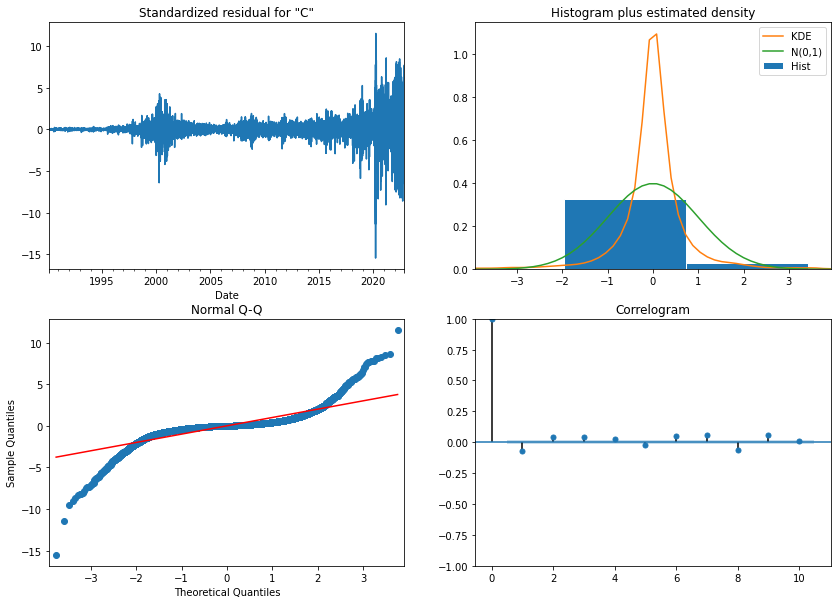

In [ ]:
results.plot_diagnostics(figsize=(14,10))
plt.show()

## Analisis de la predicción

**Una vez entrenado el modelo procedemos a analizar nuestra variable objetivo con los valores predichos de nuestro modelo y el porcentaje de error con los datos originales**

In [ ]:
pred = results.get_prediction(start=data_ts.index[-260], dynamic=False) # 260 Es un aproximado de 1 año
pred_ci = pred.conf_int()
pred_ci['Predicted'] = (pred_ci['lower Close'] + pred_ci['upper Close'])/2
pred_ci['Observed'] = data_ts['Close']
pred_ci['Diff, %%'] = ((pred_ci['Predicted'] / pred_ci['Observed'])-1) * 100
pred_ci.tail(5)

,lower Close,upper Close,Predicted,Observed,"Diff, %%"
Date,,,,,
2022-11-06,10584.839447,10867.048973,10725.944210,10475.250000,2.393205
2022-11-07,10078.602539,10360.812063,10219.707301,10564.519531,-3.263870
2022-11-08,10343.857235,10626.066759,10484.961997,10616.200195,-1.236207
2022-11-09,10617.800646,10900.010168,10758.905407,10353.169922,3.918949
2022-11-10,10419.371393,10701.580915,10560.476154,11114.150391,-4.981705


In [ ]:
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(data_ts[-260:].values, pred.predicted_mean, squared = False)
print('RMSE: ', rmse)

RMSE:  246.85024266421138


## Comparación del modelo en un año y los valores reales

Realizamos un modelamiento de aprendizaje, con los datos historicos (es decir, todavia no estamos pronosticando el futuro). Asi que, la gráfica nos muestra que el resultado, si esta aprendiendo, y se asemejan al resultados de los datos historicos.

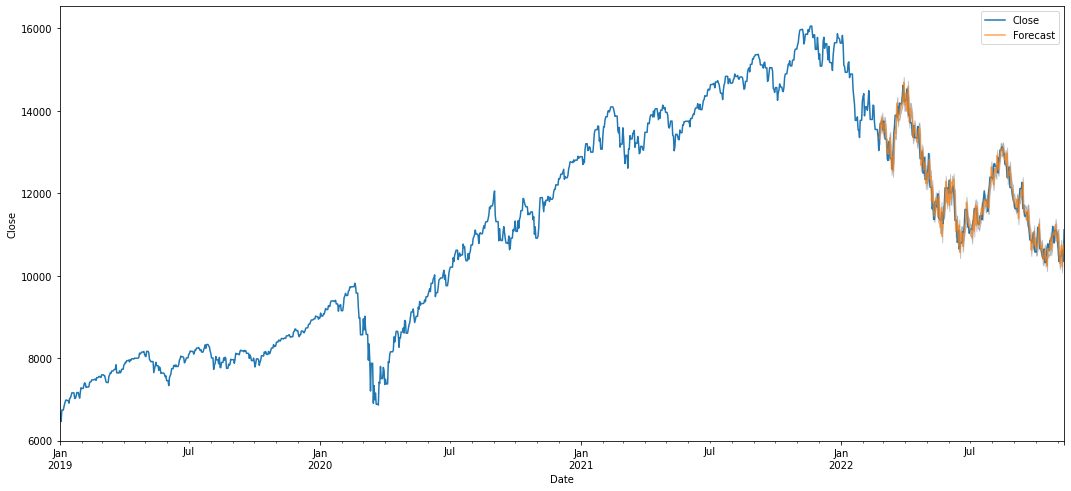

In [ ]:
ax = data_ts['2019':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=.7)
#Trazar el rango para los intervalos de confianza
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

plt.xlabel('Date')
plt.ylabel('Close')
plt.legend()
rcParams['figure.figsize'] = 12, 10
plt.show()

## Procedemos a utilizar el metodo forecasting para predecir 3 años

El pronóstico de series temporales utiliza datos y patrones históricos para predecir nuevas tendencias y el comportamiento futuro de los datos. Este método se utiliza en patrones de datos cíclicos. La previsión de series temporales se utiliza para predecir el comportamiento, las tendencias y los patrones futuros mediante el análisis de una gran cantidad de datos antiguos.

In [ ]:
# Get forecast 3 years ahead in future
pred_uc = results.get_forecast(steps = 780)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

In [ ]:
pred_ci

,lower Close,upper Close
2022-11-11,11011.663376,11293.872896
2022-11-12,10844.532610,11232.557135
2022-11-13,10715.714895,11178.011532
2022-11-14,10633.707054,11153.282470
2022-11-15,10515.079214,11080.801761
...,...,...
2024-12-25,7639.400683,15557.127911
2024-12-26,7606.697752,15528.309232
2024-12-27,7567.419530,15492.515517
2024-12-28,7491.899806,15420.123128


## Analisis de la grafica de predición 

**Al analizar 3 años en adelante. La gráfica nos muestra que hay un crecimiento constante, en los cuales hay periodos de alza, y baja en algunos intervalos.**

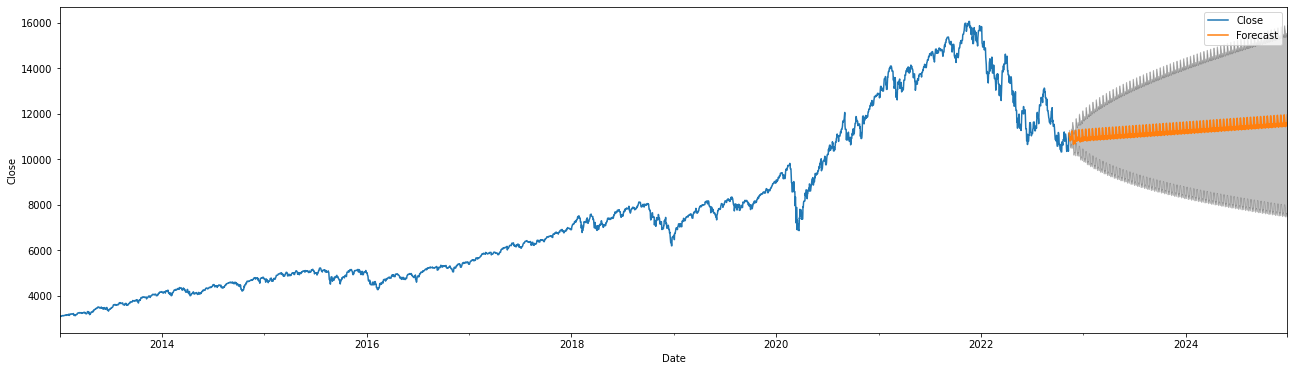

In [ ]:
ax = data_ts['2013':].plot(label='observed', figsize=(22, 6))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
plt.xlabel('Date')
plt.ylabel('Close')

plt.legend()

plt.show()

In [ ]:
pred_ci['Mean'] = (pred_ci['lower Close'] + pred_ci['upper Close'])/2
pred_ci

,lower Close,upper Close,Mean
2022-11-11,11011.663376,11293.872896,11152.768136
2022-11-12,10844.532610,11232.557135,11038.544873
2022-11-13,10715.714895,11178.011532,10946.863214
2022-11-14,10633.707054,11153.282470,10893.494762
2022-11-15,10515.079214,11080.801761,10797.940487
...,...,...,...
2024-12-25,7639.400683,15557.127911,11598.264297
2024-12-26,7606.697752,15528.309232,11567.503492
2024-12-27,7567.419530,15492.515517,11529.967524
2024-12-28,7491.899806,15420.123128,11456.011467


Text(0, 0.5, 'Close')

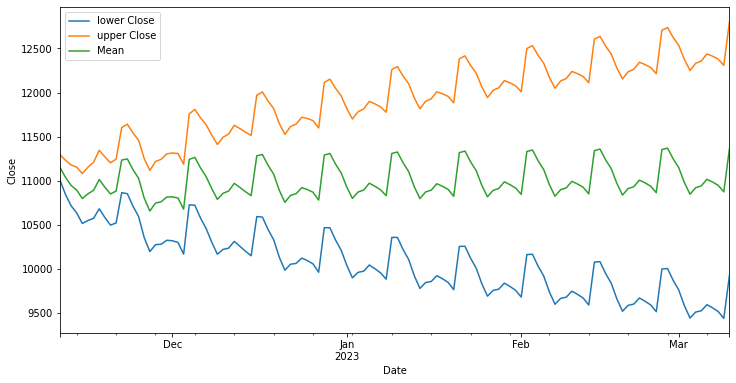

In [ ]:
rcParams['figure.figsize'] = 12, 6
pred_ci.head(120).plot()
plt.xlabel('Date')
plt.ylabel('Close')

Training dataset: 11764, Test dataset: 200


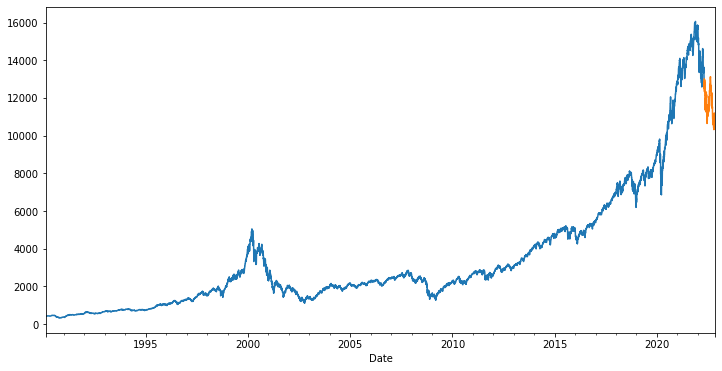

In [ ]:
split_point = len(data_ts) - 200
train, test = data_ts[0:split_point], data_ts[split_point:]
print('Training dataset: %d, Test dataset: %d' % (len(train), len(test)))
train['Close'].plot()
test['Close'].plot()

# Conclusiones Generales

1. Los datos de estudio presentados son temporales por lo cual nos obligan a generar un cambio y utilizar series de tiempo. Dado esto el modelo inicial que se venía trabajando (clasificación) no era apropiado puesto que los datos no son estaticos en el tiempo.


2. El desarrollo del trabajo ha expuesto que el modelo SARIMA es más apropiado, puesto que al trabajar con datos historicos logro una predicción que se ajusta a los datos originales. 

3. Luego de realizar todo el planteamiento, se logramos demostrar que la prediccón del modelo a través del método forecast nos arroja una baja para finales del 2022, sin embargo, para el 2024 se observa que esta al alza. 

4. El desarrollo del proyecto nos ha llevado a observar que obtuvimos un RMSE de 2.5%, lo cual indica que el modelo tiene un bajo nivel de errores con base en lo encontrado en la literatura. 

5. A lo largo del tiempo las variables lower close y upper close, se van dispersando, por lo cual se evidencia que hay mayor varianza, es decir, que existe un mayor rango de valores a predecir en el modelo haciendo que este para grandes periodos de años tenga una mayor incertidumbre

6. A raíz de este proyecto, concluimos que entre menor sea el índice AIC, mejor es el modelo. Dicho índice es un estimador de la calidad relativa del modelo que tiene en cuenta su complejidad, es decir, es el que realmente mide el desajuste, su valor aumenta cuando peor es el ajuste. A medida que se va aumentando el número de parámetros de entrada, el valor de R va a ser mejor, porque el error cuadrático medio disminuye.

7.  A modo de cierre, podemos afirmar que el modelo nos arroja un margen de confiabilidad aceptable, lo que hace que las predicciones se mantenga dentro de ese rango.
